In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
parcel_df = pd.read_csv('Parcel.csv', encoding='latin-1')

In [3]:
parcel_df= parcel_df.set_index(keys=['Major', 'Minor'])

In [4]:
# Only take KING COUNTY properties from parcel.csv
parcel_df = parcel_df[parcel_df['DistrictName']=='KING COUNTY']

In [5]:
# parcel_df.head()

In [6]:
parcel_df = parcel_df[["SqFtLot", "WfntLocation"]]

In [7]:
# parcel_df.head()

In [8]:
residentail_blg_df = pd.read_csv('ResBldg.csv')

/Applications/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [9]:
residentail_blg_df.columns
residentail_blg_df = residentail_blg_df[['Major', 'Minor', 'Address', 'SqFtTotLiving', 'Bedrooms']]
# residentail_blg_df.head()

In [10]:
sale_df = pd.read_csv('Sale.csv')


/Applications/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [11]:
sale_df.head()


,ExciseTaxNbr,Major,Minor,DocumentDate,SalePrice,RecordingNbr,Volume,Page,PlatNbr,PlatType,...,PropertyType,PrincipalUse,SaleInstrument,AFForestLand,AFCurrentUseLand,AFNonProfitUse,AFHistoricProperty,SaleReason,PropertyClass,SaleWarning
0,2687551,138860,110,08/21/2014,245000,20140828001436,,,,,...,3,6,3,N,N,N,N,1,8,
1,1235111,664885,40,07/09/1991,0,199203161090,071,001,664885,C,...,3,0,26,N,N,N,N,18,3,11
2,2704079,423943,50,10/11/2014,0,20141205000558,,,,,...,3,6,15,N,N,N,N,18,8,18 31 51
3,2584094,403700,715,01/04/2013,0,20130110000910,,,,,...,3,6,15,N,N,N,N,11,8,18 31 38
4,1056831,951120,900,04/20/1989,85000,198904260448,117,053,951120,P,...,3,0,2,N,N,N,N,1,9,49


In [13]:
sale_parcel_df = pd.merge(sale_df, parcel_df, right_index=True, left_on=['Major', 'Minor'])


ValueError: You are trying to merge on object and int64 columns. If you wish to proceed you should use pd.concat

In [ ]:
all_df = pd.merge(sale_parcel_df, unit_df, right_index=True, left_on=['Major', 'Minor'])

In [ ]:
unit_df.shape


In [ ]:
sale_df.columns
# removing the 2 rows without Major+Minor index


In [12]:
sale_df['Major'] = pd.to_numeric(sale_df['Major'], errors='coerce')
sale_df['Minor'] = pd.to_numeric(sale_df['Minor'], errors='coerce')



In [13]:
sale_df = sale_df.dropna()


In [14]:
sale_df.isna().sum()


ExciseTaxNbr          0
Major                 0
Minor                 0
DocumentDate          0
SalePrice             0
RecordingNbr          0
Volume                0
Page                  0
PlatNbr               0
PlatType              0
PlatLot               0
PlatBlock             0
SellerName            0
BuyerName             0
PropertyType          0
PrincipalUse          0
SaleInstrument        0
AFForestLand          0
AFCurrentUseLand      0
AFNonProfitUse        0
AFHistoricProperty    0
SaleReason            0
PropertyClass         0
SaleWarning           0
dtype: int64

In [ ]:
sale_df = sale_df.set_index(keys=['ExciseTaxNbr','Major', 'Minor'])

sale_df.head()


In [ ]:
parcel_df.head()


In [ ]:
sale_df.isna().sum()


In [ ]:
sale_df.info()


In [ ]:
sale_df.head(1)


In [ ]:
parcel_df


In [ ]:
unit_df.info()



In [ ]:
unit_df.head()

In [ ]:
unit_df['NbrBedrooms'].astype(int)

In [ ]:
#assuming S means Studio
nbr = unit_df['NbrBedrooms']


In [ ]:
nbr = nbr.str.replace('S', '0')


In [ ]:
#Replace spaces with 0
nbr = nbr.str.replace(' ', '0')


In [ ]:
nbr = nbr.astype(float)


In [ ]:
unit_df['NbrBedrooms'] = nbr


In [ ]:
unit_df.info()


In [ ]:
# what im going to do
wftn = parcel_df['WfntLocation']


In [ ]:
wftn = wftn.astype(bool)


In [ ]:
parcel_df['WfntLocation'] =wftn


In [ ]:
parcel_df.info()


In [ ]:
parcel_df.head(5)



In [ ]:
unit_df.head(5)



In [ ]:
parcel_unit_df = pd.merge(parcel_df, unit_df, how='inner', left_index=True, right_index=True)

In [ ]:
parcel_unit_df.info()


In [ ]:
sale_df.head()
sale_df.reset_index(level=0,inplace=True)

In [ ]:
sale_df


In [ ]:
unit_price_df = pd.merge(sale_df, unit_df, how='inner', left_index=True , right_index=True)

In [ ]:
# YAY! the inner join worked
unit_price_df

In [ ]:
# this doesnt work
housing_df = pd.merge(unit_price_df, parcel_df, how='left', left_index=True , right_index=True)

In [ ]:
housing_df.info()


In [ ]:
sale_df = sale_df[['DocumentDate','SalePrice', 'PropertyClass']]


In [ ]:
sale_df


In [15]:
new_df = pd.merge(sale_df, residentail_blg_df, left_on=['Major', 'Minor'], right_on=['Major', 'Minor'])

In [16]:
new_df.head()


,ExciseTaxNbr,Major,Minor,DocumentDate,SalePrice,RecordingNbr,Volume,Page,PlatNbr,PlatType,...,AFForestLand,AFCurrentUseLand,AFNonProfitUse,AFHistoricProperty,SaleReason,PropertyClass,SaleWarning,Address,SqFtTotLiving,Bedrooms
0,2687551,138860.0,110.0,08/21/2014,245000,20140828001436,,,,,...,N,N,N,N,1,8,,806 23RD ST SE 98002,1490,3
1,1066933,138860.0,110.0,06/12/1989,109300,198906191556,144,021,138860,P,...,N,N,N,N,1,8,,806 23RD ST SE 98002,1490,3
2,2102034,138860.0,110.0,01/16/2005,14684,20050216001248,,,,,...,N,N,N,N,14,8,51 52,806 23RD ST SE 98002,1490,3
3,2131568,138860.0,110.0,06/08/2005,0,20050617000041,,,,,...,N,N,N,N,5,8,31 51,806 23RD ST SE 98002,1490,3
4,2704079,423943.0,50.0,10/11/2014,0,20141205000558,,,,,...,N,N,N,N,18,8,18 31 51,31814 121ST AVE SE 98092,960,3


In [17]:
parcel_res_df =pd.merge(parcel_df, residentail_blg_df, left_on=['Major', 'Minor'], right_on=['Major', 'Minor'])

In [18]:
parcel_res_df.shape

(76205, 7)

In [19]:
housing_df = pd.merge(parcel_df, new_df, left_on=['Major', 'Minor'], right_on=['Major', 'Minor'])

In [20]:
housing_df.shape

(214008, 29)

In [21]:
housing_df.columns

Index(['Major', 'Minor', 'SqFtLot', 'WfntLocation', 'ExciseTaxNbr',
       'DocumentDate', 'SalePrice', 'RecordingNbr', 'Volume', 'Page',
       'PlatNbr', 'PlatType', 'PlatLot', 'PlatBlock', 'SellerName',
       'BuyerName', 'PropertyType', 'PrincipalUse', 'SaleInstrument',
       'AFForestLand', 'AFCurrentUseLand', 'AFNonProfitUse',
       'AFHistoricProperty', 'SaleReason', 'PropertyClass', 'SaleWarning',
       'Address', 'SqFtTotLiving', 'Bedrooms'],
      dtype='object')

## We are only looking at the 2017-2018 documented data

In [22]:
housing = housing_df[(housing_df['DocumentDate'].str.endswith('2018'))|(housing_df['DocumentDate'].str.endswith('2017'))]
# housing.info()

## select the features

In [23]:
housing.columns

Index(['Major', 'Minor', 'SqFtLot', 'WfntLocation', 'ExciseTaxNbr',
       'DocumentDate', 'SalePrice', 'RecordingNbr', 'Volume', 'Page',
       'PlatNbr', 'PlatType', 'PlatLot', 'PlatBlock', 'SellerName',
       'BuyerName', 'PropertyType', 'PrincipalUse', 'SaleInstrument',
       'AFForestLand', 'AFCurrentUseLand', 'AFNonProfitUse',
       'AFHistoricProperty', 'SaleReason', 'PropertyClass', 'SaleWarning',
       'Address', 'SqFtTotLiving', 'Bedrooms'],
      dtype='object')

In [24]:
housing = housing[['Major','Minor','SqFtLot','WfntLocation','SalePrice','Bedrooms']]

In [25]:
# housing.info()

## change the waterfront values into binary values and drop the 0 saleprice 

In [26]:
housing.loc[housing['WfntLocation']!=0,'WfntLocation']=1
housing.WfntLocation.unique()

array([0, 1])

In [27]:
drop_0sale = housing[housing['SalePrice']==0]
housing.drop(drop_0sale.index,axis=0,inplace=True)

In [28]:
housing.SalePrice.unique()

array([480000, 215000, 439950, ..., 349524, 163849, 127500])

## slice only the 3th to 95th percentile of the saleprice

/Applications/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'The distribution of the saleprice (before the slicing)')

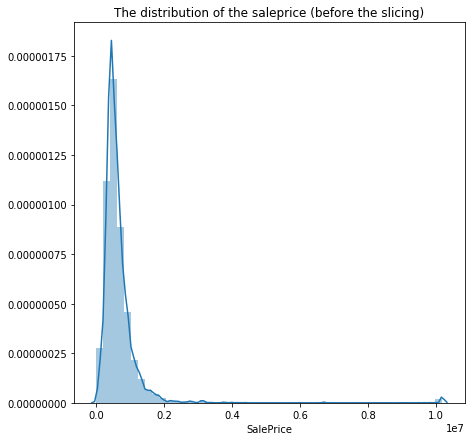

In [29]:
# let's check the distribution of the saleprice
import seaborn as sns
fig,ax = plt.subplots(figsize=(7,7))
ax = sns.distplot(housing.SalePrice)
ax.set_title('The distribution of the saleprice (before the slicing)')

In [30]:
# Find the 3th of the saleprice and the 95th of the salsprice
third = np.quantile(housing.SalePrice,.03)
ninty_five = np.quantile(housing.SalePrice,.95)
print(third)
print(ninty_five)

116311.09999999998
1311704.0


In [31]:
np.__version__

'1.16.4'

In [32]:
# After sorted the saleprice, we get rid of the last 5%

# sorted_housing = housing.SalePrice.sort_values(axis=0)
# fifth_of_price = sorted_housing[round(0.05*len(sorted_housing))]
# print('These are the original size of the dataframe: ',format(len(sorted_housing)))
# sorted_toolow_housing = sorted_housing[:round(0.05*len(sorted_housing))]
# print('These are the first 5% of the dataframe: ',format(len(sorted_toolow_housing)))
# sorted_toohigh_housing = sorted_housing[round(-0.05*len(sorted_housing)):]
# print('These are the last 5% of the dataframe: ',format(len(sorted_toohigh_housing)))
# housing_df = housing.drop(index=sorted_toolow_housing.index)
# housing_df = housing.drop(index=sorted_toohigh_housing.index)
# print('These are the final size of the dataframe: ',format(len(housing_df)))
# print(min(housing_df.SalePrice))
housing_df = ((housing_df.loc[(housing_df['SalePrice']<ninty_five)&(housing_df['SalePrice']>third)]))
# housing_df = (housing_df.loc[housing_df['SalePrice']<ninty_five])



/Applications/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'The distribution of the saleprice (after the sclicing)')

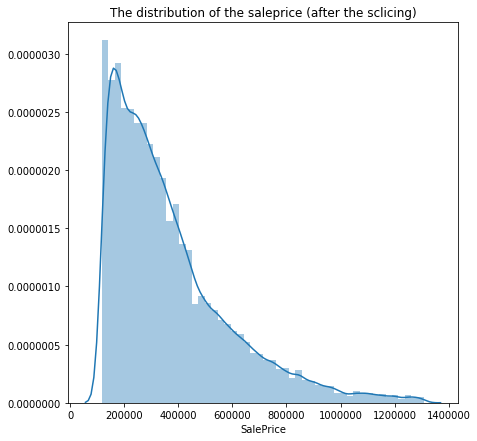

In [33]:
fig,ax = plt.subplots(figsize=(7,7))
ax = sns.distplot(housing_df.SalePrice)
ax.set_title('The distribution of the saleprice (after the sclicing)')

## Normalizing the saleprice

In [34]:
housing_df.SalePrice = np.log(housing_df.SalePrice)

/Applications/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'The distribution of the saleprice (after the sclicing and scaling)')

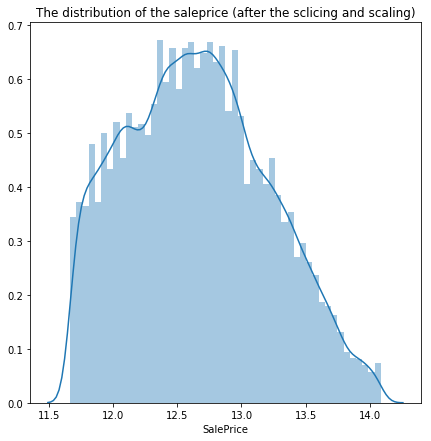

In [35]:
fig,ax = plt.subplots(figsize=(7,7))
ax = sns.distplot(housing_df.SalePrice)
ax.set_title('The distribution of the saleprice (after the sclicing and scaling)')

## check the multicolinearity 

In [42]:
predictors = housing_df[['WfntLocation','Bedrooms','SqFtLot']]

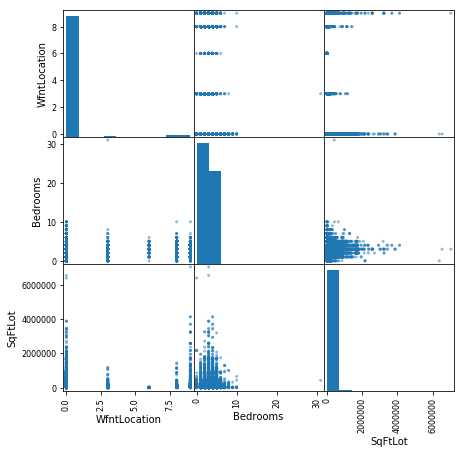

In [43]:
pd.plotting.scatter_matrix(predictors,figsize=(7,7));

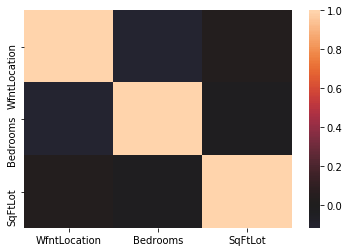

In [94]:
sns.heatmap(predictors.corr(),center=0)

In [95]:
housing.SqFtLot.unique()

array([41250,  6480,  7140, ..., 99495,  3829,  5039])

## The multiple linear regression using Statsmodels

In [44]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
predictors_int = sm.add_constant(predictors)
model = sm.OLS(housing_df.SalePrice,predictors_int).fit()

In [104]:
model.params

const           1.224721e+01
WfntLocation    1.547537e-02
Bedrooms        1.123934e-01
SqFtLot         4.241534e-07
dtype: float64

In [105]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.043
Model:                            OLS   Adj. R-squared:                  0.043
Method:                 Least Squares   F-statistic:                     1694.
Date:                Tue, 28 May 2019   Prob (F-statistic):               0.00
Time:                        16:03:17   Log-Likelihood:                -91988.
No. Observations:              113905   AIC:                         1.840e+05
Df Residuals:                  113901   BIC:                         1.840e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           12.2472      0.007   1851.695      0.000      12.234      12.260
WfntLocation     0.0155      0.001     14.526      0.000       0.013       0.018
Bedrooms         0.1124      0.002     60.083      0.000       0.109       0.116
SqFtLot       4.242e-07   1.11e-08     38.149      0.000    4.02e-07    4.46e-07
==============================================================================
Omnibus:                     4481.056   Durbin-Watson:                   1.677
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2435.003
Skew:                           0.191   Prob(JB):                         0.00
Kurtosis:                       2.394   Cond. No.                     6.74e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.74e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## The multiple linear regression using sklearn

In [46]:
from sklearn.linear_model import LinearRegression
y = housing_df.SalePrice
linreg = LinearRegression()
linreg.fit(predictors,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [107]:
print(linreg.coef_)
print(linreg.intercept_)

[1.54753728e-02 1.12393350e-01 4.24153384e-07]
12.247205528473042


## Cross-validation

In [47]:
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
X_train, X_test, y_train, y_test = train_test_split(predictors, housing_df.SalePrice)
lr = LinearRegression()
lr.fit(X_train, y_train)
lr.predict(X_test)
print(lr.score(X_test, y_test))
print(lr.coef_)
print(lr.intercept_)


0.0467012971341525
[1.57785270e-02 1.12736913e-01 3.96301792e-07]
12.247148414785292


## Let's see if the prediction model would be better if we use KNN 

## We are also doing the standard scaling

In [48]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [49]:
scaler = StandardScaler()

scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Let's use the sklearn's KNN implementation

In [50]:
from sklearn.neighbors import KNeighborsRegressor

In [51]:
nn = KNeighborsRegressor(n_neighbors=5, n_jobs=-1)

nn.fit(X_train_scaled, y_train)

sk_preds = nn.predict(X_test_scaled)

rmse = np.sqrt(mean_squared_error(y_test, sk_preds))

print(f'Root Mean Squared Error: {rmse}')

Root Mean Squared Error: 0.5418755645309961


## What K value should we pick?

In [52]:
ks = range(1, 30)

test_errors = np.zeros(len(list(ks)))

for i, k in enumerate(ks):
    
    nn = KNeighborsRegressor(n_neighbors=k, n_jobs=-1)

    nn.fit(X_train_scaled, y_train)
    preds = nn.predict(X_test_scaled)
    
    test_errors[i] = np.sqrt(mean_squared_error(y_test, preds))

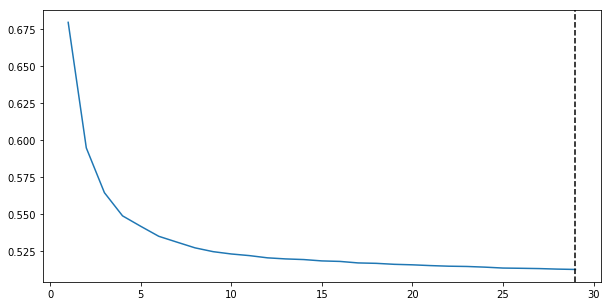

In [53]:
fig, ax = plt.subplots(figsize=(10, 5))

ax.plot(list(ks), test_errors)
ax.axvline(list(ks)[np.argmin(test_errors)], linestyle='--', color='black');

In [56]:
test_errors

array([0.67962166, 0.5947958 , 0.56455548, 0.54890005, 0.54187556,
       0.53508438, 0.53115317, 0.52728603, 0.52470772, 0.52314382,
       0.52204159, 0.52053658, 0.51980772, 0.51937155, 0.51845899,
       0.51811536, 0.51709644, 0.51681593, 0.51615588, 0.51581715,
       0.51529065, 0.51488884, 0.51470597, 0.51425034, 0.51363124,
       0.51346965, 0.51327616, 0.5129185 , 0.51269167])